In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")

# CHECK HOW MANY STRUCTURES WE HAVE RETRIEVED

In [89]:
# Load sequence summary 
summary_sequences = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_length.csv")
summary_nseq = summary_homfam[["file_combined","n_sequences_combined"]]
summary_nseq = summary_nseq.rename(columns ={"file_combined": "family", "n_sequences_combined":"tot_n_sequences"})

In [95]:
# Load mmseqs summary 
mmseqs_summary = pd.DataFrame()
for file in glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/search_hits/mmseqs/*/*.UniProtKB/filtered_hits.m8"):
    family = os.path.basename(os.path.dirname(os.path.dirname(file)))
    hits_df = str_seatoxin = pd.read_csv(file, sep='\t', header = None)
    hits_df["family"] = family
    hits_df = hits_df.rename(columns = { 0: "mmseqs_found"})
    summary=summary = hits_df[["family", "mmseqs_found"]]
    mmseqs_summary = pd.concat([mmseqs_summary, summary])
mmseqs_summary_n = mmseqs_summary.groupby("family").count().reset_index()

In [108]:
# Here according to mmseqs
summary_n = pd.merge(summary_nseq, mmseqs_summary_n, on = "family")
summary_n["missing"] = summary_n["tot_n_sequences"] - summary_n["mmseqs_found"]
summary_n.sort_values(by = "family")

,family,tot_n_sequences,mmseqs_found,missing
0,rnasemam,498,498,0
1,seatoxin,93,92,1


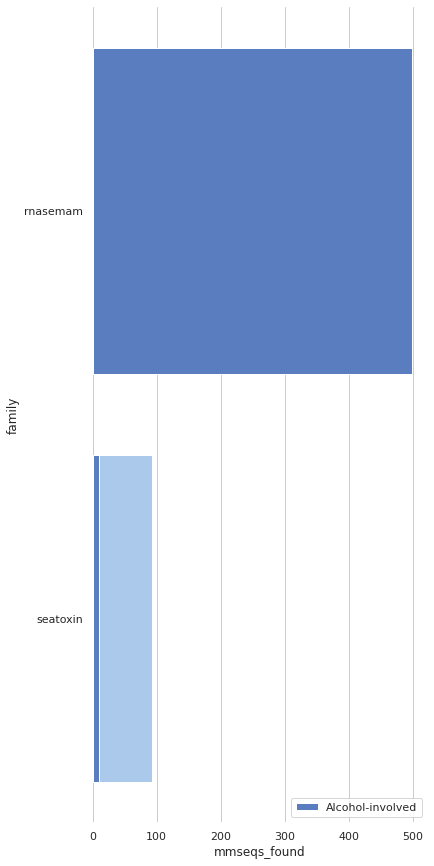

In [125]:
# Visualize 

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="tot_n_sequences", y="family", data=summary_n,color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="mmseqs_found", y="family", data=summary_n,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

In [ ]:
# Old stuff

In [2]:
# How many sequences we have per family
summary_homfam = pd.read_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "02_summary_homfam_with_refs.csv"))
summary_nseq = summary_homfam[["file_combined","n_sequences_combined"]]
summary_nseq = summary_nseq.rename(columns ={"file_combined": "family", "n_sequences_combined":"tot_n_sequences"})

# How many structures we find per family 
str_summary = pd.DataFrame()
for file in glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/ready/*/*.pdb"):
    family = os.path.basename(os.path(dirname(os.path.dirname(file))))
    str_seatoxin = pd.read_csv(hits[0], sep='\t', header = None)

    structure = os.path.basename(os.path.basename(file)).replace(".pdb", "")
    entry = pd.DataFrame({'family':[family], 'structure': structure})
    str_summary =  pd.concat([str_summary, entry], ignore_index = True)
summary_nstr = str_summary.groupby("family").count().reset_index()
summary_nstr = summary_nstr.rename(columns ={"structure":"tot_n_structures"})


In [42]:
# Check on one example how many we retrieve

# Seatoxin
fam_id = "seatoxin"
seqs_seatoxin = summary[summary.family == fam_id ]

# Structures
hits = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/search_hits/mmseqs/seatoxin/seatoxin.UniProtKB/filtered_hits.m8")
str_seatoxin = pd.read_csv(hits[0], sep='\t', header = None)
str_seatoxin[0] = str_seatoxin[0].str.replace("/", "_")

In [35]:
id_seqs = set(seqs_seatoxin["sequence"])
id_str = set(str_seatoxin[0])

In [46]:
id_seqs - id_str

{'B1NWT1_NEMVE_41-81'}

In [52]:
hits = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/search_hits/mmseqs/seatoxin/seatoxin.UniProtKB/hits.m8")
a = pd.read_csv(hits[0], sep='\t', header = None)
a[0] = a[0].str.replace("/", "_")

In [62]:
a[0][a[0].str.contains("B1NWT1")]

Series([], Name: 0, dtype: object)

In [63]:
a[0]

0         TXAC_ANTEL_3-45
1         TXAC_ANTEL_3-45
2         TXAC_ANTEL_3-45
3         TXAC_ANTEL_3-45
4         TXAC_ANTEL_3-45
              ...        
781    B1NWS8_NEMVE_41-83
782    B1NWS8_NEMVE_41-83
783    B1NWS8_NEMVE_41-83
784    B1NWS8_NEMVE_41-83
785    B1NWS8_NEMVE_41-83
Name: 0, Length: 786, dtype: object

In [4]:
# Check how many structures we are missing per family 
summary_n = pd.merge(summary_nseq, summary_nstr, on = "family")
summary_n["missing"] = summary_n["tot_n_sequences"] - summary_n["tot_n_structures"]
summary_n.sort_values(by = "family")

,family,tot_n_sequences,tot_n_structures,missing
1,hip,167,17,150
0,rnasemam,498,87,411


In [ ]:
# Then take all the structures we can and run fold seek on all 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1ahl,P01530,1.0,49,0,0,1,49,1,49,3.810000e-31,124,1.0,1.000,1.0,P01530,p01530,1.0
1,1apf,P01531,1.0,49,0,0,1,49,1,49,1.072000e-31,125,1.0,1.000,1.0,P01531,p01531,1.0
2,1atx,P01533,1.0,46,0,0,1,46,1,46,1.237000e-27,113,1.0,1.000,1.0,P01533,p01533,1.0
3,1bds,P11494,1.0,43,0,0,1,43,1,43,1.334000e-26,110,1.0,1.000,1.0,P11494,p11494,1.0
4,1sh1,P19651,1.0,48,0,0,1,48,1,48,3.557000e-27,112,1.0,1.000,1.0,P19651,p19651,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TXH2_ANTS7/3-45,P0C5F4,1.0,43,0,0,1,43,3,45,4.744000e-26,109,1.0,0.915,1.0,P0C5F4,p0c5f4,1.0
88,TXH7_ANTS7/3-45,P0C5F5,1.0,43,0,0,1,43,3,45,1.832000e-26,110,1.0,0.915,1.0,P0C5F5,p0c5f5,1.0
89,TXH8_ANTS7/3-45,P0C5F6,1.0,43,0,0,1,43,3,45,9.714000e-27,111,1.0,0.915,1.0,P0C5F6,p0c5f6,1.0
90,TXNA_CONGI/3-45,P0C280,1.0,43,0,0,1,43,3,45,8.946000e-26,108,1.0,0.915,1.0,P0C280,p0c280,1.0


In [58]:
def get_best_hits(hits):

    df = pd.read_csv(hits, sep='\t', header = None)
    # 1 - Get all the sequences with maximum identity
    df_grouped = df.groupby([0]).agg({2:'max'})
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.rename(columns={2:'identity_max'})
    df = pd.merge(df, df_grouped, how='left', on=[0])
    df = df[df[2] == df['identity_max']]

    # Hits presenting a best match that also have the same id name are prioritized
    df["target_id_nochain"] = df[1].str.split("_",expand = True)[0]
    df["target_id_chainmerged"] = df[1].str.replace("_", "").str.lower()

    df_id_match_1 = df[df[0] == df["target_id_nochain"]]
    df_id_match_2 = df[df[0] == df["target_id_chainmerged"]]
    df_id_match = pd.concat([df_id_match_1,df_id_match_2])
    
    # If there are multiple matches per sequence( multiple chains for example), pick the firt one
    df_id_match = df_id_match.groupby(0).first().reset_index()

    # Only retain the dataframe
    df_noid_match = df[~df[0].isin(df_id_match[0])].reset_index(drop = True)
    if(not df_noid_match.empty):
        df_noid_match['max_fam'] = df_noid_match.groupby([0])[2].transform('max')
        df_noid_match = df_noid_match[df_noid_match[2] == df_noid_match['max_fam']]
        df_noid_match_filtered = df_noid_match.groupby(0).first().reset_index()
        final_df = pd.concat([df_id_match,df_noid_match_filtered])
    else:
        final_df = df_id_match

    return(final_df)

def main():
    df = get_best_hits(hits)
    df.to_csv(output, sep="\t", header=None, index=False)

    # 2. Create file with IDs to download
    df["target_id_nochain"].to_csv(output_ids, sep="\t", header=None, index=False)

    # 3. Create file also with chain informations
    df["chain"] = df[1].str.split("_", expand = True)[1]
    df[[0,1,"chain","target_id_nochain"]].to_csv(output_chains, sep="\t", header=None, index=False)

    # 4. Create template file
    df["sep"] = "_P_"
    df["query_id"]=">"+df[0]
    cols =  ["query_id","sep","target_id_nochain"]
    df[cols].to_csv(template, sep=" ", header=None, index=False)

In [59]:
df = get_best_hits(hits)

In [78]:
df[df[1].str.contains("_")]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,identity_max,target_id_nochain,target_id_chainmerged,max_fam,chain


In [80]:
df[[0,1,"chain","target_id_nochain"]]

,0,1,chain,target_id_nochain
0,1ahl,P01530,NA,P01530
1,1apf,P01531,NA,P01531
2,1atx,P01533,NA,P01533
3,1bds,P11494,NA,P11494
4,1sh1,P19651,NA,P19651
...,...,...,...,...
87,TXH2_ANTS7/3-45,P0C5F4,NA,P0C5F4
88,TXH7_ANTS7/3-45,P0C5F5,NA,P0C5F5
89,TXH8_ANTS7/3-45,P0C5F6,NA,P0C5F6
90,TXNA_CONGI/3-45,P0C280,NA,P0C280


In [76]:
df[df[1].str.contains("_")][1].str.split("_", expand = True)[1]

Series([], Name: 1, dtype: object)

In [79]:
# 3. Create file also with chain informations


NameError: name 'output_chains' is not defined

In [ ]:

# 2. Create file with IDs to download
df["target_id_nochain"].to_csv(output_ids, sep="\t", header=None, index=False)



# 4. Create template file
df["sep"] = "_P_"
df["query_id"]=">"+df[0]
cols =  ["query_id","sep","target_id_nochain"]
df[cols].to_csv(template, sep=" ", header=None, index=False)

In [71]:
df["chain"] = df[1].str.split("_", expand = True)[1]

KeyError: 1

In [18]:

# Check the amount of matches after filtering mmseqs
mmseqs_summary = pd.DataFrame()
for file in glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/search_hits/mmseqs/ins/*.UniProtKB/hits.m8"):
    family = os.path.basename(os.path.dirname(file)).replace("-ref.PDB", "")
    with open(file, 'r') as fp:
        nhits = len(fp.readlines())
    entry = pd.DataFrame({'family':[family], 'nhits': nhits})
    mmseqs_summary =  pd.concat([mmseqs_summary, entry], ignore_index = True)

In [19]:
mmseqs_summary

,family,nhits
0,ins.UniProtKB,106813


In [43]:
def plot_heatmap(tab_plot, dataset = "", title = 'Average % hits per family '):
    f, ax = plt.subplots(figsize=(9, 6))
    ax.set_title(title +dataset, pad=30)
    vmin, vmax = 0,100

    sns.heatmap(tab_plot, annot=True, linewidths=1, ax=ax, cmap = cmap, center=(vmin + vmax) / 2., vmax=vmax) 
    ax.set_xlabel("minimum identity")
    ax.set_ylabel("minimum coverage")
    ax.invert_yaxis()

def collect_nhits(df_summary,df, fam, min_identity,min_cov, col_identity = 2, col_cov = 12):
    # Only retain the ones that pass the threshold
    df = df[(df[col_identity]>=min_identity) & (df[col_cov]>=min_cov)]
    nhits = df.groupby([0]).count().shape[0]
    newrow = {'family': [fam], 'min_identity':[min_identity], 'min_cov':[min_cov], 'nhits':[nhits]}
    # Output df
    # Family, min_cov, min_identity, #hits, full file path 
    res = pd.DataFrame(newrow)
    return(res)

def get_stats_search(hits):
    #file = "/home/luisasantus/Desktop/crg_cluster/data/tf/cisbp/data_pbm_train/F323_2.00/blast/PDB/2022-10-01/F323_2.00_2022-10-01-blastp.out"
    df_summary = pd.DataFrame()
    # Collect all blast output files
    for file in list(glob.glob(hits)):
                print(file)
                # Read each of the blast output file and retrieve family name
                if os.path.getsize(file) > 0:
                    df = pd.read_csv(file, sep='\t', header = None)
                    # Bring coverages to percentages
                    df[2] = df[12]*100
                    df[12] = df[12]*100
                    df[13] = df[13]*100
                    fam = file.split(sep = "/")[-5]
                    # Try each identity thresholds and coverage thresholds
                    for min_identity in min_identity_list: 
                        for min_cov in min_cov_list: 
                            # Store how many hits we find
                            newrow = collect_nhits(df_summary, df, fam, min_identity, min_cov, col_cov=13)
                            df_summary = pd.concat([df_summary,newrow])


    # Prep format for plotting                         
    df_summary = df_summary.reset_index(drop=True)
    df_summary = pd.merge(df_summary, families_summary, on = "family")
    df_summary["perc_hits"] = df_summary.nhits *100 / df_summary.nseq
    df_plot = df_summary.groupby(["min_cov", "min_identity"]).mean(["perc_hits"]).reset_index()
    tab_plot = df_plot.pivot_table(index='min_cov', columns='min_identity', values='perc_hits')
    return([df_summary,tab_plot])

In [21]:
df = pd.read_csv(hits, sep='\t', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Q2Z1U2_CRAGI/41-159,Q2Z1U2,1.000,119,0,0,1,119,41,159,4.707000e-76,257,1.000,0.739
1,Q2Z1U2_CRAGI/41-159,K1P3X0,0.949,119,6,0,1,119,73,187,1.812000e-69,238,1.000,0.608
2,Q5U8T6_EPICO/71-103,Q7T107,1.000,33,0,0,1,33,47,79,8.339000e-16,79,1.000,0.317
3,Q5U8T6_EPICO/71-103,Q800M7,1.000,33,0,0,1,33,47,79,8.339000e-16,79,1.000,0.306
4,Q5U8T6_EPICO/71-103,Q800N0,1.000,33,0,0,1,33,47,79,8.339000e-16,79,1.000,0.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106808,O93380_MELGA/51-109,A0A8J6FM73,0.915,59,5,0,1,59,51,109,9.555000e-32,126,1.000,0.386
106809,O93380_MELGA/51-109,A7BK19,0.915,59,5,0,1,59,46,104,1.312000e-31,126,1.000,0.399
106810,O93380_MELGA/51-109,A7BK20,0.915,59,5,0,1,59,46,104,1.312000e-31,126,1.000,0.369
106811,O93380_MELGA/51-109,A0A8T3CS53,0.915,59,5,0,1,59,48,106,1.801000e-31,125,1.000,0.364


In [38]:
min_identity_list = list(range(0,101,10))
min_cov_list = list(range(0,101,10))
uniprot_search_stats, uniprot_search_stats_forplot = get_stats_search(hits)

/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/pdbs/structures/search_hits/mmseqs/ins/ins.UniProtKB/hits.m8


NameError: name 'families_summary' is not defined

In [22]:
df = pd.read_csv(hits, sep='\t', header = None)
# 1 - Get all the sequences with maximum identity
df_grouped = df.groupby([0]).agg({2:'max'})
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={2:'identity_max'})
df = pd.merge(df, df_grouped, how='left', on=[0])
df = df[df[2] == df['identity_max']]

# Hits presenting a best match that also have the same id name are prioritized
df["target_id_nochain"] = df[1].str.split("_",expand = True)[0]
df["target_id_chainmerged"] = df[1].str.replace("_", "").str.lower()

df_id_match_1 = df[df[0] == df["target_id_nochain"]]
df_id_match_2 = df[df[0] == df["target_id_chainmerged"]]
df_id_match = pd.concat([df_id_match_1,df_id_match_2])

# If there are multiple matches per sequence( multiple chains for example), pick the firt one
df_id_match = df_id_match.groupby(0).first().reset_index()

# Only retain the dataframe
df_noid_match = df[~df[0].isin(df_id_match[0])].reset_index(drop = True)
if(not df_noid_match.empty):
    df_noid_match['max_fam'] = df_noid_match.groupby([0])[2].transform('max')
    df_noid_match = df_noid_match[df_noid_match[2] == df_noid_match['max_fam']]
    df_noid_match_filtered = df_noid_match.groupby(0).first().reset_index()
    final_df = pd.concat([df_id_match,df_noid_match_filtered])

In [31]:
summary_nseq[summary_nseq.family == "ins"]

,family,tot_n_sequences
41,ins,793


In [54]:
final_df[final_df[2] < 1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,identity_max,target_id_nochain,target_id_chainmerged,max_fam
313,D3Z9V4_RAT/26-120,A0A8C6IJL8,0.947,95,5,0,1,95,26,120,4.085000e-56,198,1.0,0.779,0.947,A0A8C6IJL8,a0a8c6ijl8,0.947
369,INSL3_HUMAN/31-129,P51460,0.989,99,1,0,1,99,31,129,1.919000e-63,220,1.0,0.756,0.989,P51460,p51460,0.989
499,Q1WM24_HUMAN/28-172,A0A2I3SLP1,0.993,145,1,0,1,145,28,172,1.768000e-86,289,1.0,0.725,0.993,A0A2I3SLP1,a0a2i3slp1,0.993
521,Q2LZ97_DROPS/42-130,B4HAE6,0.988,89,1,0,1,89,42,130,4.781000e-54,192,1.0,0.669,0.988,B4HAE6,b4hae6,0.988
